In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
np.random.seed(12345)  # setup seed to reproduce random values
data = np.random.randint(0, 10, [11, 2])

In [220]:
data

array([[2, 5],
       [1, 4],
       [9, 5],
       [2, 1],
       [6, 1],
       [9, 7],
       [6, 0],
       [2, 9],
       [1, 2],
       [6, 7],
       [7, 7]])

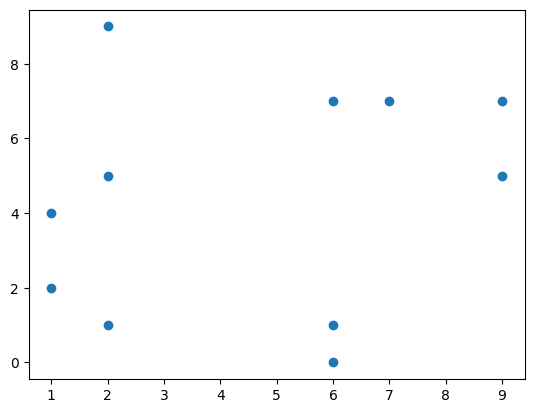

In [221]:
plt.scatter(data[:, 0], data[:, 1])

In [222]:
np.random.seed(0)
num_centers = 3
centeroids = np.random.randint(0, 10, [3, 2])
centeroids

array([[5, 0],
       [3, 3],
       [7, 9]])

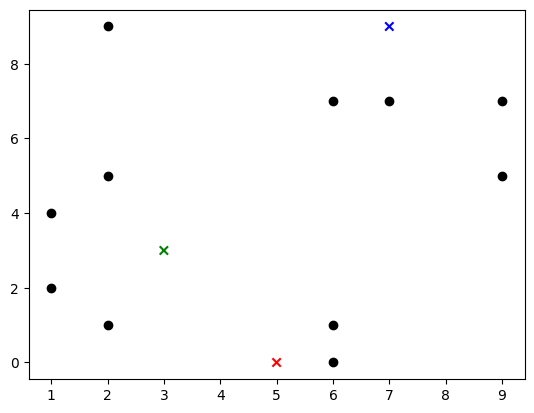

In [223]:
plt.scatter(data[:, 0], data[:, 1], c='black')
plt.scatter(centeroids[:, 0], centeroids[:, 1], c=['red', 'green', 'blue'], marker='x')

In [65]:
data.shape

(11, 2)

In [71]:
a = np.insert(data, 0, centeroids[0][0], axis=1)

In [75]:
a = np.insert(a, 2, centeroids[0][1], axis=1)

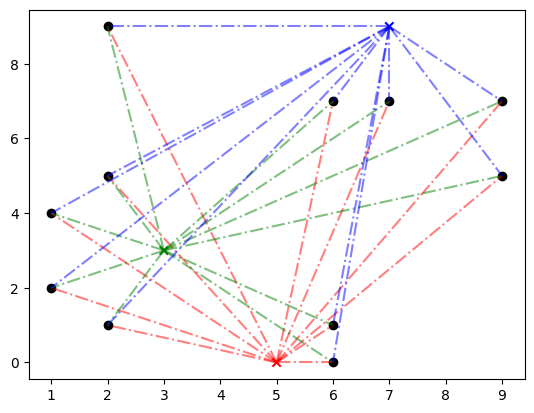

In [224]:
def plot_points_links(points, centers):
    plt.scatter(points[:, 0], points[:, 1], c='black')
    colors = ['red', 'green', 'blue']
    plt.scatter(centers[:, 0], centers[:, 1], c=colors, marker='x')
    for i, c in enumerate(centers):
        a = np.insert(points.astype('float'), 0, c[0], axis=1)
        a = np.insert(a, 2, c[1], axis=1)
        for b in a:
            plt.plot(b[:2], b[2:], '-.', c=colors[i], alpha=0.5)

plot_points_links(data, centeroids)

In [20]:
(data - centeroids[0]) ** 2

array([[ 4, 36],
       [ 0, 16],
       [ 9, 81],
       [16, 49],
       [16, 36],
       [ 9,  0],
       [ 0,  0],
       [16, 36],
       [ 9,  0],
       [ 0,  4],
       [ 1,  9]])

In [23]:
np.sum(np.square(data - centeroids[0]), axis=1)

array([40, 16, 90, 65, 52,  9,  0, 52,  9,  4, 10])

In [24]:
np.sqrt(np.sum(np.square(data - centeroids[0]), axis=1))

array([6.32455532, 4.        , 9.48683298, 8.06225775, 7.21110255,
       3.        , 0.        , 7.21110255, 3.        , 2.        ,
       3.16227766])

In [38]:
np.around(np.sqrt(np.sum(np.square(data - centeroids[0]), axis=1)), decimals=2).reshape(1,-1)

array([[6.32, 4.  , 9.49, 8.06, 7.21, 3.  , 0.  , 7.21, 3.  , 2.  , 3.16]])

In [225]:
distances = None
for c in centeroids:
    a = np.around(np.sqrt(np.sum(np.square(data - c), axis=1)), decimals=2).reshape(-1, 1)
    if distances is None:
        distances = a
    else:
        distances = np.concatenate((distances, a), axis=1)

In [226]:
distances

array([[5.83, 2.24, 6.4 ],
       [5.66, 2.24, 7.81],
       [6.4 , 6.32, 4.47],
       [3.16, 2.24, 9.43],
       [1.41, 3.61, 8.06],
       [8.06, 7.21, 2.83],
       [1.  , 4.24, 9.06],
       [9.49, 6.08, 5.  ],
       [4.47, 2.24, 9.22],
       [7.07, 5.  , 2.24],
       [7.28, 5.66, 2.  ]])

In [96]:
np.argmin(distances, axis=1)

array([1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1], dtype=int64)

In [227]:
def get_distances(points, centers):
    dists = None
    for c in centers:
        a = np.around(np.sqrt(np.sum(np.square(points - c), axis=1)), decimals=2).reshape(-1, 1)
        if dists is None:
            dists = a
        else:
            dists = np.concatenate((dists, a), axis=1)
    
    return dists

In [228]:
min_d = np.argmin(get_distances(data, centeroids), axis=1)
data[(min_d == 0)]

array([[6, 1],
       [6, 0]])

In [229]:
data[(min_d == 0)][:,0]

array([6, 6])

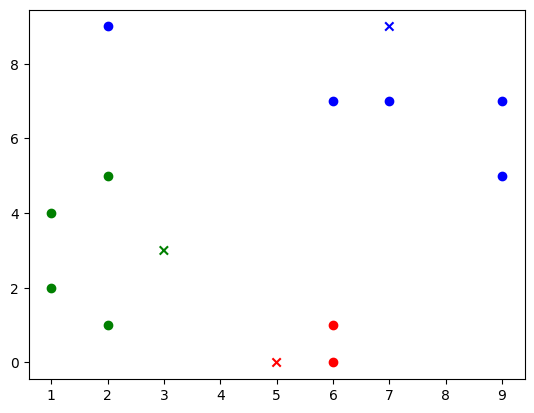

In [230]:
def plot_points_type(points, dists, centers):
    min_d = np.argmin(dists, axis=1)

    colors = ['red', 'green', 'blue']
    nums = centers.shape[0]
    for i in range(num_centers):
        members = points[(min_d == i)]
        plt.scatter(members[:, 0], members[:, 1], c=colors[i])

    plt.scatter(centers[:, 0], centers[:, 1], c=colors, marker='x')

plot_points_type(data, distances, centeroids)

In [112]:
np.sum(data[(min_d == 0)], axis=0)

array([20,  2])

In [218]:
data[(min_d == 2)]

array([[8, 9],
       [9, 6],
       [9, 6]])

In [231]:
np.average(data[(min_d == 2)], axis=0)

array([6.6, 7. ])

In [232]:
next_centers = None
for i in range(num_centers):
    members = data[(min_d == i)]
    a = np.average(members, axis=0)
    if next_centers is None:
        next_centers = a
    else:
        next_centers = np.vstack((next_centers, a))

next_centers

array([[6. , 0.5],
       [1.5, 3. ],
       [6.6, 7. ]])

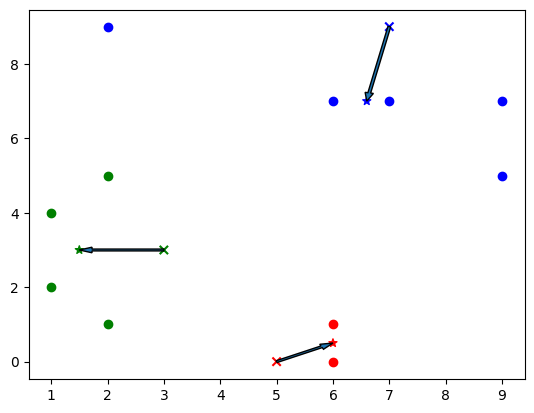

In [233]:
def plot_next_centers(points, dists, centers):
    min_d = np.argmin(dists, axis=1)

    colors = ['red', 'green', 'blue']
    next_c = None
    for i in range(centers.shape[0]):
        members = points[(min_d == i)]
        plt.scatter(members[:, 0], members[:, 1], c=colors[i])

        a = np.average(members, axis=0)
        if next_c is None:
            next_c = a
        else:
            next_c = np.vstack((next_c, a))

    plt.scatter(centers[:, 0], centers[:, 1], c=colors, marker='x')
    plt.scatter(next_c[:, 0], next_c[:, 1], c=colors, marker='*')
    
    for i in range(centers.shape[0]):
        plt.arrow(centers[i, 0], centers[i, 1], next_c[i, 0]-centers[i, 0], next_c[i, 1]-centers[i, 1], width=0.05, length_includes_head=True)
    
    return next_c

next_centers = plot_next_centers(data, distances, centeroids)

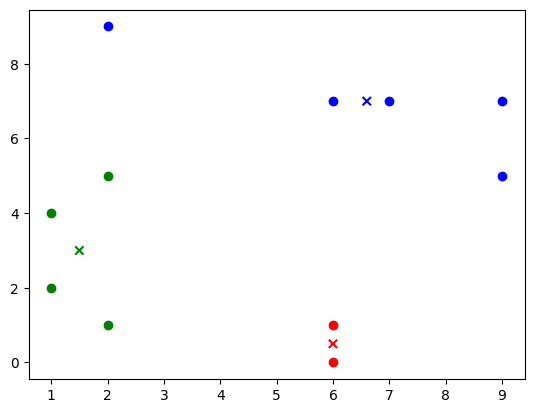

In [234]:
plot_points_type(data, distances, next_centers)

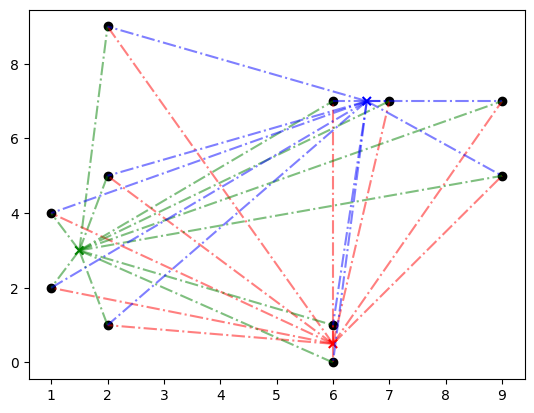

In [235]:
plot_points_links(data, next_centers)

In [165]:
get_distances(data, next_centers)
# np.argmin(dists, axis=1)

array([[5.85, 1.25, 5.75],
       [3.5 , 1.6 , 4.74],
       [9.01, 5.84, 2.11],
       [7.63, 3.4 , 7.67],
       [6.8 , 5.34, 1.05],
       [3.04, 6.56, 7.03],
       [0.5 , 5.15, 7.9 ],
       [6.8 , 5.34, 1.05],
       [3.04, 5.3 , 9.67],
       [1.5 , 3.25, 6.2 ],
       [2.69, 3.01, 4.81]])

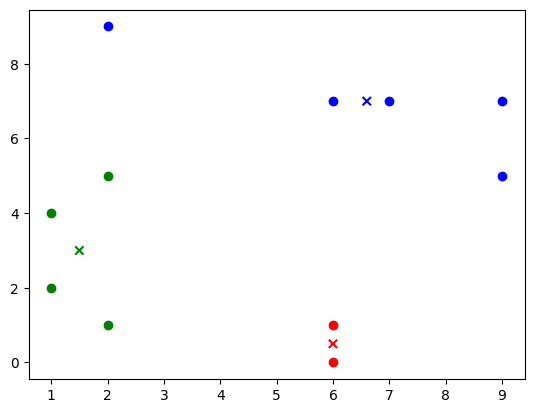

In [236]:
plot_points_type(data, get_distances(data, next_centers), next_centers)

In [167]:
a = np.argmin(get_distances(data, centeroids), axis=1)
b = np.argmin(get_distances(data, next_centers), axis=1)

a != b

array([False, False, False, False, False, False, False, False, False,
       False,  True])

In [169]:
member

array([[6, 3]])

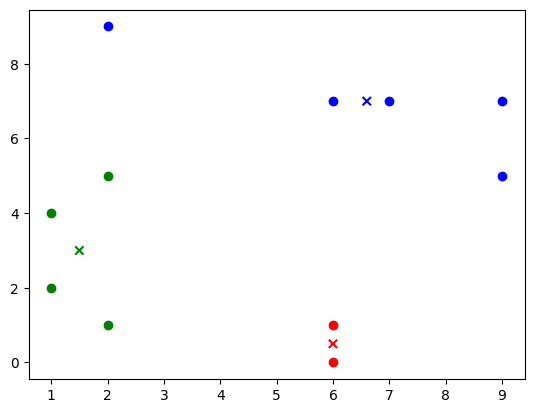

In [237]:
plot_points_type(data, get_distances(data, next_centers), next_centers)

a = np.argmin(get_distances(data, centeroids), axis=1)
b = np.argmin(get_distances(data, next_centers), axis=1)
member = data[a != b]

plt.scatter(member[:, 0], member[:, 1], s=200, color='orange', marker='o') 

In [191]:
class A:
    def __init__(self, ax):
        self.ax = ax
    
    def init():
        # points
        np.random.seed(1234)  # setup seed to reproduce random values
        self.data = np.random.randint(0, 10, [11, 2])
        
        # init centers
        np.random.seed(0)
        self.centeroids = np.random.randint(0, 10, [3, 2])
        
        # colors
        self.colors = ['red', 'green', 'blue']
        
        # functions
        self.plot_functions = [
            self.f_1,
            self.f_2,
            self.f_3
        ]
    
    def plot_points_links(self, points, centers):
        self.ax.scatter(points[:, 0], points[:, 1], c='black')
        colors = ['red', 'green', 'blue']
        self.ax.scatter(centers[:, 0], centers[:, 1], c=colors, marker='x')
        for i, c in enumerate(centers):
            a = np.insert(points.astype('float'), 0, c[0], axis=1)
            a = np.insert(a, 2, c[1], axis=1)
            for b in a:
                self.ax.plot(b[:2], b[2:], '-.', c=colors[i], alpha=0.5)
    
    def update(self, frame):
        print(f'frame = {frame}')
        # self.ax.clear()
        self.plot_functions[frames]
        return self.ax
        
    def f_1(self):
        self.ax.scatter(self.data[:, 0], self.data[:, 1], c='black')
    
    def f_2(self):
        self.ax.scatter(self.data[:, 0], self.data[:, 1], c='black')
        self.ax.scatter(self.centeroids[:, 0], self.centeroids[:, 1], c=self.colors, marker='x')
    
    def f_3(self):
        self.plot_points_links(self, self.data, self.centeroids)

<Figure size 640x480 with 0 Axes>

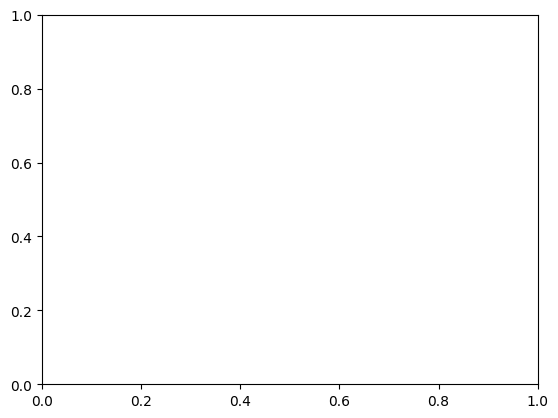

In [193]:
from matplotlib.animation import FuncAnimation

plt.figure()

fig, ax = plt.subplots()

a = A(ax)

ani = FuncAnimation(fig, a.update, frames=list(range(3)), init_func=a.init)

plt.show()

In [ ]:
ax.cl